필요한 패키지 ```foreign```, ```dplyr``` 설치

In [51]:
install.packages("foreign")
install.packages("dplyr")
library(foreign)
library(dplyr)

Warning message:
"unable to access index for repository http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5:
  URL 'http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5/PACKAGES'를 열 수 없습니다"Warning message:
"package 'foreign' is in use and will not be installed"Warning message:
"unable to access index for repository http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5:
  URL 'http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5/PACKAGES'를 열 수 없습니다"Warning message:
"package 'dplyr' is in use and will not be installed"

부가조사, 개인별 조사 불러들이기

In [52]:
dt17_a <- read.spss("C:/Users/eunee/khu_sda_project/data/klips17a.sav",
                   use.value.labels = FALSE, to.data.frame = TRUE)
dt17_p <- read.spss("C:/Users/eunee/khu_sda_project/data/klips17p_i.sav",
                   use.value.labels = FALSE, to.data.frame = TRUE)

### 부가조사 : ```rdt_a```

In [53]:
rdt_a <- subset(dt17_a,
                select = c(pid, a177102, a177103, a177105, a177106))
names(rdt_a) <- c("pid", "wstart_h", "wstart_m", "wend_h", "wend_m")

In [54]:
str(rdt_a)

'data.frame':	11686 obs. of  5 variables:
 $ pid     : num  101 401 402 902 501401 ...
 $ wstart_h: num  7 9 13 9 9 NA 4 10 9 NA ...
 $ wstart_m: num  0 0 0 0 0 NA 0 30 0 NA ...
 $ wend_h  : num  18 18 15 17 18 NA 14 22 18 NA ...
 $ wend_m  : num  0 0 0 0 0 NA 0 30 0 NA ...


### 개인별 : ```rdt_p```

In [55]:
rdt_p <- subset(dt17_p,
                select = c(pid, p171003, p174321, p170101, p170104, p170401, p171642, p170314, p170110))
names(rdt_p) <- c("pid", "fixedwt", "wspacesat", "gend", "birth", "comp_type", "wage", "jobty", "educ")

In [56]:
str(rdt_p)

'data.frame':	13168 obs. of  9 variables:
 $ pid      : num  101 102 201 202 203 401 402 602 902 903 ...
 $ fixedwt  : num  2 1 1 1 NA 1 NA 1 1 NA ...
 $ wspacesat: num  3 3 3 3 NA 2 2 3 2 NA ...
 $ gend     : num  2 1 1 2 2 1 2 2 2 2 ...
 $ birth    : num  1941 1968 1951 1954 1979 ...
 $ comp_type: num  6 1 1 1 NA 3 NA 3 4 NA ...
 $ wage     : num  25 250 102 82 NA 500 NA 22 300 NA ...
 $ jobty    : num  3 3 3 2 NA 1 4 2 1 NA ...
 $ educ     : num  4 5 5 5 6 7 6 3 8 7 ...


### ```rdt_i``` : ```rdt_a```, ```rdt_p``` 에 대한 merge(inner join)

```pid``` 기준으로 inner join

In [57]:
rdt_i <- merge(rdt_a, rdt_p, by = "pid")

In [58]:
str(rdt_i)

'data.frame':	11679 obs. of  13 variables:
 $ pid      : num  101 102 203 401 402 ...
 $ wstart_h : num  7 8 NA 9 13 9 NA NA 4 10 ...
 $ wstart_m : num  0 30 NA 0 0 0 NA NA 0 30 ...
 $ wend_h   : num  18 18 NA 18 15 17 NA NA 14 22 ...
 $ wend_m   : num  0 0 NA 0 0 0 NA NA 0 30 ...
 $ fixedwt  : num  2 1 NA 1 NA 1 NA NA 1 1 ...
 $ wspacesat: num  3 3 NA 2 2 2 NA NA 3 3 ...
 $ gend     : num  2 1 2 1 2 2 2 2 1 2 ...
 $ birth    : num  1941 1968 1979 1970 1969 ...
 $ comp_type: num  6 1 NA 3 NA 4 NA NA 1 1 ...
 $ wage     : num  25 250 NA 500 NA 300 NA NA 70 130 ...
 $ jobty    : num  3 3 NA 1 4 1 NA NA 1 1 ...
 $ educ     : num  4 5 6 7 6 8 7 2 3 4 ...


### ```rdt_i```의 ```NA``` 알아보기 

In [59]:
colSums(is.na(rdt_i))

pid  wstart_h  wstart_m    wend_h    wend_m   fixedwt wspacesat      gend 
        0      4349      4349      4349      4349      6505      4349         0 
    birth comp_type      wage     jobty      educ 
        0      6505      6515      4349         0

In [60]:
head(rdt_i)

pid,wstart_h,wstart_m,wend_h,wend_m,fixedwt,wspacesat,gend,birth,comp_type,wage,jobty,educ
101,7,0,18,0,2,3,2,1941,6,25,3,4
102,8,30,18,0,1,3,1,1968,1,250,3,5
203,NA,NA,NA,NA,NA,NA,2,1979,NA,NA,NA,6
401,9,0,18,0,1,2,1,1970,3,500,1,7
402,13,0,15,0,NA,2,2,1969,NA,NA,4,6
902,9,0,17,0,1,2,2,1970,4,300,1,8


```rdt_i```는 ```pid```를 ```key```로 한 inner join이기 때문에 ```pid```의 ```NA```는 0이다.   
설명변수인 ```wstart_h```와 ```wstart_m```에 해당하지 않거나(```NA```), 모름/무응답(```-1```)인 사례는 연구관심 밖이므로 가장 먼저 제거가 필요하다.

## 설명변수(출근시간) 만들기

In [61]:
nrdt_i <- rdt_i
nrdt_i$nwstart_h <- ifelse(nrdt_i$wstart_h == -1, NA, nrdt_i$wstart_h)
nrdt_i$nwstart_m <- ifelse(nrdt_i$wstart_m == -1, NA, nrdt_i$wstart_m)

```ifelse```문을 활용해 ```nrdt_i```의 ```wstart_h```가 ```-1```(모름/무응답) 인 경우 ```NA```, 그렇지 않으면 원래 ```wstart_h``` 값을 주도록 했다. (```wstart_m```)의 경우도 마찬가지로 수행했다.

In [62]:
nrdt_i <- nrdt_i[complete.cases(nrdt_i[ , c("nwstart_h", "nwstart_m")]), ]

In [63]:
colSums(is.na(nrdt_i))

pid  wstart_h  wstart_m    wend_h    wend_m   fixedwt wspacesat      gend 
        0         0         0         0         0      2128         0         0 
    birth comp_type      wage     jobty      educ nwstart_h nwstart_m 
        0      2128      2134         0         0         0         0

```complete.cases```를 활용하여 ```nwstart_h```와 ```nwstart_m```에 ```NA```가 있는 행을 제거했다. (모름/무응답에 해당하는 ```-1```도 우리가 위에서 ```NA```로 만들었으므로 함께 제거된다.)

In [64]:
head(nrdt_i)

,pid,wstart_h,wstart_m,wend_h,wend_m,fixedwt,wspacesat,gend,birth,comp_type,wage,jobty,educ,nwstart_h,nwstart_m
1,101,7,0,18,0,2,3,2,1941,6,25,3,4,7,0
2,102,8,30,18,0,1,3,1,1968,1,250,3,5,8,30
4,401,9,0,18,0,1,2,1,1970,3,500,1,7,9,0
5,402,13,0,15,0,NA,2,2,1969,NA,NA,4,6,13,0
6,902,9,0,17,0,1,2,2,1970,4,300,1,8,9,0
9,1101,4,0,14,0,1,3,1,1957,1,70,1,3,4,0


```wstart_h```와 ```wstart_m```에 ```NA```가 있는 행들이 제거되었다.

In [65]:
nrdt_i$nwstart_m <- ifelse(nrdt_i$nwstart_m == "0", "00", nrdt_i$nwstart_m)
nrdt_i$nwstart_m <- ifelse(nrdt_i$nwstart_m == "1", "01", nrdt_i$nwstart_m)
nrdt_i$nwstart_m <- ifelse(nrdt_i$nwstart_m == "2", "02", nrdt_i$nwstart_m)
nrdt_i$nwstart_m <- ifelse(nrdt_i$nwstart_m == "3", "03", nrdt_i$nwstart_m)
nrdt_i$nwstart_m <- ifelse(nrdt_i$nwstart_m == "4", "04", nrdt_i$nwstart_m)
nrdt_i$nwstart_m <- ifelse(nrdt_i$nwstart_m == "5", "05", nrdt_i$nwstart_m)
nrdt_i$nwstart_m <- ifelse(nrdt_i$nwstart_m == "6", "06", nrdt_i$nwstart_m)
nrdt_i$nwstart_m <- ifelse(nrdt_i$nwstart_m == "7", "07", nrdt_i$nwstart_m)
nrdt_i$nwstart_m <- ifelse(nrdt_i$nwstart_m == "8", "08", nrdt_i$nwstart_m)
nrdt_i$nwstart_m <- ifelse(nrdt_i$nwstart_m == "9", "09", nrdt_i$nwstart_m)

0분을 00분, 1분을 01분 (...) 으로 만드는 작업을 수행했다.    
(예를 들어 오전 7시를 700, 오후 1시 30분을 1330처럼 나타내기 위함이다.)

In [66]:
nrdt_i$nwstart <- paste(nrdt_i$nwstart_h, nrdt_i$nwstart_m, sep = "")

```nwstart_h```와 ```nwstart_m```을 ```nwstart```로 합친다.

In [67]:
typeof(nrdt_i$nwstart)

[1] "character"

숫자처럼 보이지만 문자형이다. 문자형으로 저장된 경우 ```cut```할 수 없으므로 integer로 만들어준 다음 ```cut```한다.

In [68]:
nrdt_i$nwstart <- strtoi(nrdt_i$nwstart)

In [69]:
nrdt_i$nwstart_c <- cut(nrdt_i$nwstart,
                        breaks = c(-Inf, 700, 800, 900, 1000, Inf), ##이렇게 보는게 더 잘보임
                        right=FALSE, labels = c("A", "B", "C", "D", "E"))

A : ~ 7시 이전   
B : 7시 ~ 8시    
C : 8시 ~ 9시      
D : 9시 ~ 10시    
E : 10시 이후 ~   
   
로 범주화했다. 이 범주 외의 값은 ```NA```로 만들어 제거한다.

In [70]:
summary(nrdt_i$nwstart)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0   800.0   900.0   901.2   900.0  2315.0 

In [71]:
summary(nrdt_i$nwstart_c)

A    B    C    D    E 
 536  652 2247 2418 1380

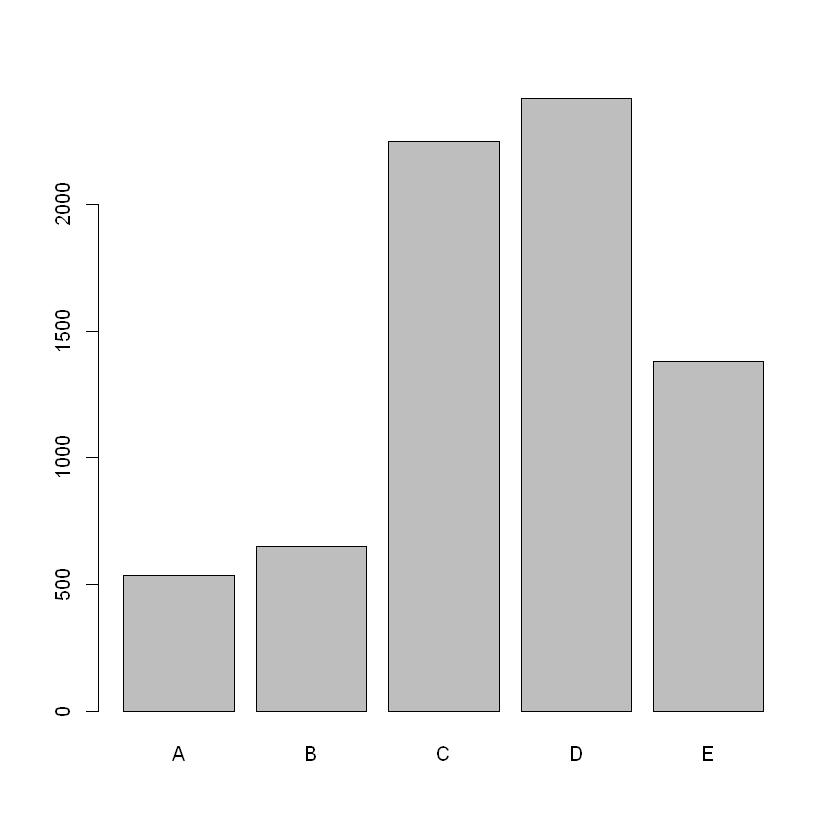

In [72]:
plot(nrdt_i$nwstart_c)

In [73]:
summary(nrdt_i$nwstart_c)

A    B    C    D    E 
 536  652 2247 2418 1380

A : ~ 7시 이전   
B : 7시 ~ 8시    
C : 8시 ~ 9시      
D : 9시 ~ 10시    
E : 10시 이후 ~   
   
```summary``` 함수로 각 범주별 사례수를 확인 가능하며 (```NA```는 범주에 포함되지 않는 사례이다.)

설명변수 클리닝을 ```nrdt_i$nwstart_c```로 완료하였다.

## 종속변수(전반적일자리만족도) 클리닝

In [74]:
summary(nrdt_i$wspacesat)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -1.000   2.000   3.000   2.698   3.000   5.000 

모름/무응답 을 ```NA```로 처리해야 한다.

In [75]:
nrdt_i$nwspacesat <- ifelse(nrdt_i$wspacesat == -1, NA, nrdt_i$wspacesat)

```-1```인 경우 ```NA```로, 그렇지 않을 경우 ```nrdt_i$wspacesat```을 그대로 가진다.

In [76]:
nrdt_i <- nrdt_i[complete.cases(nrdt_i[ , "nwspacesat"]), ]

역코딩을 실시한다.

In [77]:
nrdt_i$nwspacesat_c <- c(5,4,3,2,1)[match(nrdt_i$nwspacesat, c(1,2,3,4,5))]

In [78]:
colSums(is.na(nrdt_i))

pid     wstart_h     wstart_m       wend_h       wend_m      fixedwt 
           0            0            0            0            0         2120 
   wspacesat         gend        birth    comp_type         wage        jobty 
           0            0            0         2120         2126            0 
        educ    nwstart_h    nwstart_m      nwstart    nwstart_c   nwspacesat 
           0            0            0            0            0            0 
nwspacesat_c 
           0

## 혼동변수 클리닝
### 연령
출생년도 ```birth```를 이용해 연령 ```age``` 혼동변수를 만들어 보자.

In [79]:
nrdt_i <- nrdt_i %>% 
  mutate(age = 2014-birth)

조사년도인 2014년에서 출생년도를 빼서 연령을 계산했다.

### 종사상 지위
(1) 상용직   
(2) 임시직   
(3) 일용직   
(4) 고용주/자영업자   
(5) 무급가족종사자
   
중 상용직, 임시직, 일용직만 가져와 범주화한다.

In [80]:
nrdt_i$jobty_c <- c(0,1,2)[match(nrdt_i$jobty, c(1,2,3))]
nrdt_i$jobty_c <- factor(nrdt_i$jobty_c)

0 : 상용직   
1 : 임시직   
2 : 일용직   

In [81]:
summary(nrdt_i$jobty_c)

0    1    2 NA's 
3706  850  521 2120

### 기업형태
(1) : 민간회사 또는 개인 사업체  
(2) : 외국인 회사   
(3) : 정부투자기관, 정부출연기관, 공사합동기업   
(4) : 법인단체    
(5) : 정부기관   
(6) : 나는 특정회사나 사업체에 소속되어 있지 않다   
(7) : 시민단체, 종교단체  
(8) : 기타    

In [82]:
nrdt_i$comp_type <- ifelse(nrdt_i$comp_type == -1, NA, nrdt_i$comp_type)
nrdt_i$comp_type <- ifelse(nrdt_i$comp_type == 8, NA, nrdt_i$comp_type)
nrdt_i$comp_type <- ifelse(nrdt_i$comp_type == 7, NA, nrdt_i$comp_type)
nrdt_i$comp_type <- ifelse(nrdt_i$comp_type == 6, NA, nrdt_i$comp_type)

필요하지 않은 범주는 ```NA```처리한다.

In [83]:
nrdt_i$comp_type <- c(1, 1 ,2, 1, 2)[match(nrdt_i$comp_type, c(1, 2, 3, 4, 5))]

0 : 민간회사, 개인 사업체, 외국인 회사, 법인단체     
1 : 정부투자기관, 정부출연기관, 공사합동기업, 정부기관   

In [84]:
nrdt_i$comp_type_c <- cut(nrdt_i$comp_type, breaks = c(1,2,3),
                          right = FALSE,
                          labels = c("0", "1"))

In [85]:
summary(nrdt_i$comp_type_c)

0    1 NA's 
4242  665 2290

### 성별

In [86]:
nrdt_i$gend <- ifelse(nrdt_i$gend == -1, NA, nrdt_i$gend)

In [87]:
nrdt_i$gend_c <- cut(nrdt_i$gend, breaks = c(1,2,3),
                     right = FALSE,
                     labels = c("0", "1"))

In [88]:
summary(nrdt_i$gend_c)

0    1 
4288 2909

0 : 남성   
1 : 여성

성별 범주 중 ```-1```은 모름/무응답이므로 ```NA```로 만든다.

### 학력

In [89]:
nrdt_i$educ <- c(0,0,0,0,1,2,3,4,4)[match(nrdt_i$educ, c(1,2,3,4,5,6,7,8,9))]
nrdt_i$educ <- factor(nrdt_i$educ)

In [90]:
summary(nrdt_i$educ)

0    1    2    3    4 
1432 2534 1144 1732  355

0 : 미취학, 무학, 초등학교, 중학교   
1 : 고등학교   
2 : 2년제 대학, 전문대학   
3 : 4년제 대학
4: 대학원 석사, 대학원 박사   
    
학력변수를 생성한 뒤 재범주화하였다.

### 임금
임금은 로그를 취하여 만든다.

In [91]:
nrdt_i$wage <- ifelse(nrdt_i$wage<0, NA, nrdt_i$wage)
nrdt_i$lnwage <- log(nrdt_i$wage+0.01)

In [92]:
summary(nrdt_i$lnwage)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 -4.605   4.942   5.298   5.276   5.704   8.294    2126 

### 근로시간
출근시간과 퇴근시간의 차이로 근로시간을 계산한다.

In [93]:
nrdt_i$wend_h <- ifelse(nrdt_i$wend_h == -1, NA, nrdt_i$wend_h)
nrdt_i$wend_m <- ifelse(nrdt_i$wend_m == -1, NA, nrdt_i$wend_m)

퇴근 시간과 분에서 ```-1```은 모름/무응답이므로 ```NA```로 만든다.

In [94]:
nrdt_i$wend_m <- ifelse(nrdt_i$wend_m == "0", "00", nrdt_i$wend_m)
nrdt_i$wend_m <- ifelse(nrdt_i$wend_m == "1", "01", nrdt_i$wend_m)
nrdt_i$wend_m <- ifelse(nrdt_i$wend_m == "2", "02", nrdt_i$wend_m)
nrdt_i$wend_m <- ifelse(nrdt_i$wend_m == "3", "03", nrdt_i$wend_m)
nrdt_i$wend_m <- ifelse(nrdt_i$wend_m == "4", "04", nrdt_i$wend_m)
nrdt_i$wend_m <- ifelse(nrdt_i$wend_m == "5", "05", nrdt_i$wend_m)
nrdt_i$wend_m <- ifelse(nrdt_i$wend_m == "6", "06", nrdt_i$wend_m)
nrdt_i$wend_m <- ifelse(nrdt_i$wend_m == "7", "07", nrdt_i$wend_m)
nrdt_i$wend_m <- ifelse(nrdt_i$wend_m == "8", "08", nrdt_i$wend_m)
nrdt_i$wend_m <- ifelse(nrdt_i$wend_m == "9", "09", nrdt_i$wend_m)

0분을 00분, 1분을 01분 (...) 으로 만드는 작업을 수행했다.

In [95]:
nrdt_i$nwstart_t <- (strtoi(nrdt_i$nwstart_m)+(strtoi(nrdt_i$nwstart_h)*60))
nrdt_i$wend_t <- (strtoi(nrdt_i$wend_m)+(strtoi(nrdt_i$wend_h)*60))

계산의 편의를 위해 출근시간과 퇴근시간을 분 단위로 표시한다.

In [96]:
nrdt_i$w_time_m <- nrdt_i$wend_t - nrdt_i$nwstart_t

출근시간과 퇴근시간의 차이로 근무시간을 설명한다. 이때 근무시간은 분 단위

In [97]:
nrdt_i$w_time_m <- ifelse(nrdt_i$w_time_m <= 0, nrdt_i$w_time_m+ (24*60), nrdt_i$w_time_m)

출퇴근 시간의 차이가 음수인 경우 24시간*60분을 더한다.

In [98]:
nrdt_i$w_time <- nrdt_i$w_time_m/60

분 단위로 만들어진 근무시간을 시간 단위로 변환한다.

## 최종 데이터 셋

In [99]:
nrdt_attach <- data.frame(nrdt_i$pid, nrdt_i$nwstart, nrdt_i$nwstart_c,  nrdt_i$nwspacesat_c, nrdt_i$w_time, nrdt_i$gend_c, nrdt_i$age, 
                          nrdt_i$comp_type_c, nrdt_i$educ, nrdt_i$jobty_c, nrdt_i$lnwage)

In [101]:
nrdt_names <- c("pid", "wstart", "wstart_c", "wspacesat", "wtime", "gend", "age", "comp_type", "educ", "jobty", "lnwage")
names(nrdt_attach) <- nrdt_names

In [102]:
nrdt_attach <- nrdt_attach[complete.cases(nrdt_attach),]

In [103]:
summary(nrdt_attach)

      pid               wstart       wstart_c   wspacesat         wtime        
 Min.   :     102   Min.   :   0.0   A: 276   Min.   :1.000   Min.   : 0.3333  
 1st Qu.:  193204   1st Qu.: 800.0   B: 366   1st Qu.:3.000   1st Qu.: 9.0000  
 Median :  353154   Median : 900.0   C:1764   Median :3.000   Median : 9.0000  
 Mean   : 1869049   Mean   : 898.1   D:1771   Mean   :3.309   Mean   : 9.5734  
 3rd Qu.:  596177   3rd Qu.: 900.0   E: 715   3rd Qu.:4.000   3rd Qu.:10.0000  
 Max.   :11014502   Max.   :2300.0            Max.   :5.000   Max.   :24.0000  
 gend          age       comp_type educ     jobty        lnwage      
 0:2893   Min.   :18.0   0:4230    0: 665   0:3662   Min.   :-4.605  
 1:1999   1st Qu.:35.0   1: 662    1:1640   1: 813   1st Qu.: 4.942  
          Median :42.0             2: 931   2: 417   Median : 5.298  
          Mean   :43.6             3:1373            Mean   : 5.292  
          3rd Qu.:52.0             4: 283            3rd Qu.: 5.704  
          Max.   :80

In [ ]:
save.image(file="C:/Users/eunee/khu_sda_project/data_cleaning.RData")

## 최종 데이터 셋 변수 정리
- ```pid``` : pid
- ```wstart``` : 출근시간 (연속형)   
- ```wstart_c``` : 출근시간 (범주형) 
  - A : 7시 이전
  - B : 7시 ~ 8시
  - C : 8시 ~ 9시
  - D : 9시 ~ 10시
  - E : 10시 이후
- ```wspacesat``` : 전반적일자리만족도 (연속형)  
  - 1 : 매우 불만족
  - 2 : 불만족
  - 3 : 보통
  - 4 : 만족
  - 5 : 매우 만족
- ```wtime``` : 주당 평균 근로시간 (연속형)
- ```gend``` : 성별 (이분형)  
  - 0 : 남성
  - 1 : 여성
- ```age``` : 연령 (연속형)
- ```comp_type``` : 기업형태 (범주형) 
  - 0 : 민간 (민간회사, 개인 사업체, 외국인 회사, 법인단체)
  - 1 : 비민간 (정부투자기관, 정부출연기관, 공사합동기업, 정부기관)
- ```educ``` : 학력 (범주형)  
  - 0 : 미취학, 무학, 초등학교, 중학교
  - 1 : 고등학교
  - 2 : 2년제 대학, 전문대학
  - 3 : 4년제 대학
  3대학원 석사, 대학원 박사
- ```jobty``` : 종사상지위 (범주형)  
  - 0 : 상용직
  - 1 : 임시직
  - 2 : 일용직
- ```lnwage``` : 로그 임금 (연속형)